CROP YIELD PREDICTION


DATA SET 1 Reading

In [ ]:
import pandas as pd
df = pd.read_csv('finalised_dataset.csv',na_values='=')
df

In [ ]:
df=df.drop('Yield', axis = 1)

DATA FRAME INFORMATION to read column information

In [ ]:
df.info()

SELECT ONE STATE DATA ONLY - MAHARASHTRA

In [ ]:
df = df[df['state_names'] == "Maharashtra"]
df.info()

In [ ]:
df.info()

CHECK NULL VALUES IN COLUMN OF DATA SET - We can replace null values with Mean, Median, etc.

In [ ]:
df.isnull().sum()

HEAD IS USED TO GET THE VALUES OF THAT ROWS THAT WE WANT

In [ ]:
df.head(10)

In [ ]:
df

CORRELATION HEAT MAP -expresses how the two variable are depending upon each other

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
C_mat = df.corr()
fig = plt.figure(figsize = (12,12))
sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

takin data only after 2004

In [ ]:
df=df[df['crop_year']>=2004]
df

In [ ]:
df.info()

converting data into numerical value - here we have 5 objects we need to convert them into numeric value for ML

In [ ]:
df = df.join(pd.get_dummies(df['district_names']))
df = df.join(pd.get_dummies(df['season_names']))
df = df.join(pd.get_dummies(df['crop_names']))
df = df.join(pd.get_dummies(df['state_names']))
df = df.join(pd.get_dummies(df['soil_type']))
df

In [ ]:
df['Yield'] = df['production']/df['area']
df

In [ ]:
df = df.drop('production', axis=1)

In [ ]:
df

Dropping unnecessary column

In [ ]:
df=df.drop('district_names', axis=1)
df = df.drop('season_names',axis=1)
df = df.drop('crop_names',axis=1)

In [ ]:
df = df.drop('state_names', axis=1)
df = df.drop('soil_type', axis=1)
df

In [ ]:
df2=df["area"].mean()
print(df2)
df3=df["area"].min()
print(df3)
df4=df["area"].max()
print(df4)

Preprocessing - [(value-min column)/(max-min)]

In [ ]:
from sklearn import preprocessing

In [ ]:
# Create x, where x the 'scores' column's values as floats
x = df[['area']].values.astype(float)
x
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
#df_normalized = pd.DataFrame(x_scaled) [(value-min column)/(max-min)]
x_scaled

df['area'] = x_scaled
df

Fill null values with mean (sum of all values of that column divided by N

In [ ]:
df = df.fillna(df.mean())
df

Split our data into train or test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
a=df

In [ ]:
b = df['Yield']
#a = df.drop('Yield', axis = 1)

In [ ]:
df

In [ ]:
c = df.drop('Unnamed: 0', axis = 1)

In [ ]:
a=c.drop('Yield', axis = 1)

In [ ]:
len(a.columns)

In [ ]:
a.columns

In [ ]:
features_list=['crop_year', 'area', 'temperature', 'wind_speed', 'pressure',
       'humidity', 'N', 'P', 'K', 'AHMEDNAGAR', 'AKOLA', 'AMRAVATI',
       'AURANGABAD', 'BEED', 'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE',
       'GADCHIROLI', 'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR',
       'LATUR', 'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD',
       'PALGHAR', 'PARBHANI', 'PUNE', 'RAIGAD', 'RATNAGIRI', 'SANGLI',
       'SATARA', 'SINDHUDURG', 'SOLAPUR', 'THANE', 'WARDHA', 'WASHIM',
       'YAVATMAL', 'Kharif     ', 'Rabi       ', 'Summer     ', 'Whole Year ',
       'Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Gram',
       'Groundnut', 'Jowar', 'Linseed', 'Maize', 'Moong(Green Gram)',
       'Niger seed', 'Other  Rabi pulses', 'Other Cereals & Millets',
       'Other Kharif pulses', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower',
       'Sesamum', 'Soyabean', 'Sugarcane', 'Sunflower', 'Tobacco', 'Urad',
       'Wheat', 'other oilseeds', 'Maharashtra', 'chalky', 'clay', 'loamy',
       'peaty', 'sandy', 'silt', 'silty']

In [ ]:
features_list123=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

len(features_list123)

In [ ]:
a=df[features_list]

split our data set into 70:30

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3,random_state=42)

print(a_train)
# a_train will be training input
print(a_test)
# a_train will be test input
print(b_train)
# a_train will be training output
print(b_test)
# a_train will be test output

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(a_train, b_train)
b_pred = regr.predict(a_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
print('MAE =', mae(b_pred, b_test))
print('R2score =', r2_score(b_pred, b_test))
print('R2score in percentage =', r2_score(b_pred, b_test)*100)

classifier is used when there is our targeted result is class

Neural network implementation


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from tensorflow.keras.callbacks import History 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = a_train.shape[1], activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
NN_model.summary()

In [ ]:
from tensorflow.keras.callbacks import History 
history = History()
History=NN_model.fit(a_train, b_train, epochs=50, batch_size=500, validation_split = 0.2, callbacks=[history])

In [ ]:
print(history.history.keys())
plt.plot(History.history['mean_absolute_error'])
plt.ylabel('Loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(History.history['mean_absolute_error'])
plt.plot(History.history['val_mean_absolute_error'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Polynomial support vector machine


In [ ]:
from sklearn.svm import SVR
regressorpoly=SVR(kernel='poly',epsilon=1.0)
regressorpoly.fit(a_train,b_train)
pred=regressorpoly.predict(a_test)
print("MAE=", regressorpoly.score(a_test,b_test))
print('Yield=', r2_score(b_test,b_pred))

XGB regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
XGBModel = XGBRegressor()
XGBModel.fit(a_train,b_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(a_test)
MAE = mean_absolute_error(b_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)
print(r2_score(b_test , XGBpredictions))
print("Yield  after apply XGboost :",(r2_score(b_test , XGBpredictions))*100)
XGBpredictions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Load the dataset
df = pd.read_csv('finalised_dataset.csv')
df.info()

In [ ]:
df.drop(df[(df['production']=="=")].index, inplace=True)
df['production']=df['production'].astype(float)
df['Yield']=df['production']/df['area']
df

In [ ]:
df=df.drop('district_names',axis=1)
# df=df.drop('yield',axis=1)
# df=df.drop('Area',axis=1)
df=df.drop('season_names',axis=1)
df=df.drop('state_names',axis=1)
df=df.drop('soil_type',axis=1)
df=df.drop('production',axis=1)
# df=df.drop('N',axis=1)
# df=df.drop('P',axis=1)
# df=df.drop('K',axis=1)
df=df.drop('crop_year',axis=1)
df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
c_mat=df.corr()
fig=plt.figure(figsize=(12,12))
sb.heatmap(c_mat,vmax=.8,square=True)
plt.show()

In [ ]:
from sklearn import preprocessing
x=df[['area']].values.astype(float)
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(x)
df['area']=x_scaled
df[['area','Yield']]

In [ ]:
df['Yield'].mean()
df=df[df['Yield']>4.2]
df

In [ ]:
df=df.fillna(df.mean())
df.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split
a=df
b=df[['crop_names']]
a=a.drop('Unnamed: 0',axis=1)
a=a.drop('crop_names',axis=1)
a=a.drop('area',axis=1)
# a=a.drop('Yield',axis=1)

In [ ]:
a

In [ ]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=42)
print(a_train)
print(a_test)
print(b_train)
print(b_test)

In [ ]:
import lightgbm as lbm
model=lbm.LGBMClassifier()
model.fit(a_train,b_train)
b_pred=model.predict(a_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(b_pred,b_test)
print("Score: ",score)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(b_test,b_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,fmt=".0f",square=True,cmap="Blues",linewidth=5)
plt.ylabel("Actual")
plt.xlabel("Predict")
plt.show()

In [ ]:
df.iloc[12]

In [ ]:
df.iloc[12].values

In [ ]:
df['crop_names'].nunique(),
df['crop_names'].unique()

In [ ]:
model.predict([[ 20.933285, 2.011367, 1015.406196, 20.815299, 0.465, 0.465, 0.465, 182.653061]])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0,0.357955
1,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0,0.557461
2,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0,0.455882
3,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0,1.222222
4,125196,Maharashtra,AHMEDNAGAR,1997,Kharif,Maize,4400,21.642354,2.075066,1015.702482,21.571403,sandy,5.640,14.664,14.664,4700.0,1.068182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
12623,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
12624,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
12625,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


In [ ]:
df.isnull().sum()

Unnamed: 0          0
state_names         0
district_names      0
crop_year           0
season_names        0
crop_names          0
area                0
temperature         0
wind_speed          0
pressure            0
humidity            0
soil_type           0
N                   0
P                   0
K                   0
production        132
Yield             132
dtype: int64

In [ ]:
data = df.dropna()
print(data.shape)
test = df[~df["production"].notna()].drop("production",axis=1)
print(test.shape)

(12495, 17)
(132, 16)


In [ ]:
for i in data.columns:
    print("column name :",i)
    print("No. of column :",len(data[i].unique()))
    print(data[i].unique())

column name : Unnamed: 0
No. of column : 12495
[125192 125193 125194 ... 137816 137817 137818]
column name : state_names
No. of column : 1
['Maharashtra']
column name : district_names
No. of column : 35
['AHMEDNAGAR' 'AKOLA' 'AMRAVATI' 'AURANGABAD' 'BEED' 'BHANDARA' 'BULDHANA'
 'CHANDRAPUR' 'DHULE' 'GADCHIROLI' 'GONDIA' 'HINGOLI' 'JALGAON' 'JALNA'
 'KOLHAPUR' 'LATUR' 'MUMBAI' 'NAGPUR' 'NANDED' 'NANDURBAR' 'NASHIK'
 'OSMANABAD' 'PALGHAR' 'PARBHANI' 'PUNE' 'RAIGAD' 'RATNAGIRI' 'SANGLI'
 'SATARA' 'SINDHUDURG' 'SOLAPUR' 'THANE' 'WARDHA' 'WASHIM' 'YAVATMAL']
column name : crop_year
No. of column : 18
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014]
column name : season_names
No. of column : 5
['Kharif     ' 'Rabi       ' 'Summer     ' 'Whole Year ' 'Autumn     ']
column name : crop_names
No. of column : 34
['Arhar/Tur' 'Bajra' 'Gram' 'Jowar' 'Maize' 'Moong(Green Gram)'
 'Pulses total' 'Ragi' 'Rice' 'Sugarcane' 'Total foodgrain' 'Urad'
 'Other  Rab

In [ ]:
sum_maxp = data["production"].sum()
data["percent_of_production"] = data["production"].map(lambda x:(x/sum_maxp)*100)

In [ ]:
data

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield,percent_of_production
0,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0,0.357955,0.000499
1,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0,0.557461,0.012092
2,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0,0.455882,0.001472
3,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0,1.222222,0.000087
4,125196,Maharashtra,AHMEDNAGAR,1997,Kharif,Maize,4400,21.642354,2.075066,1015.702482,21.571403,sandy,5.640,14.664,14.664,4700.0,1.068182,0.000372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000,0.000261
12623,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846,0.000016
12624,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962,0.002121
12625,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404,0.000910


In [ ]:
data.groupby("season_names",axis=0).agg({"production":np.sum})

,production
season_names,
Autumn,18582.0
Kharif,536463806.7
Rabi,70912135.5
Summer,2957812.0
Whole Year,653287157.0


In [ ]:
data["crop_names"].value_counts()[:5]

Maize        1052
Sunflower     946
Jowar         875
Groundnut     868
Rice          652
Name: crop_names, dtype: int64

In [ ]:
top_crop_pro = data.groupby("crop_names")["production"].sum().reset_index().sort_values(by='production',ascending=False)
top_crop_pro[:5]

,crop_names,production
26,Sugarcane,938485965.0
4,Cotton(lint),71786349.0
8,Jowar,55018576.0
21,Rice,43008628.0
25,Soyabean,39994352.0


In [ ]:
rice_df = data[data["crop_names"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(652, 18)


,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield,percent_of_production
8,125200,Maharashtra,AHMEDNAGAR,1997,Kharif,Rice,5900,21.629676,2.107639,1014.724315,20.920126,chalky,0.000,0.000,0.0,7200.0,1.220339,0.000570
30,125222,Maharashtra,AHMEDNAGAR,1998,Kharif,Rice,5600,20.837657,2.069813,1014.443876,21.373319,peaty,6.516,16.652,0.0,7400.0,1.321429,0.000586
61,125253,Maharashtra,AHMEDNAGAR,1999,Kharif,Rice,5700,20.770676,2.006089,1013.240450,20.705661,peaty,920.828,0.000,0.0,8000.0,1.403509,0.000633


<Axes: xlabel='season_names', ylabel='production'>

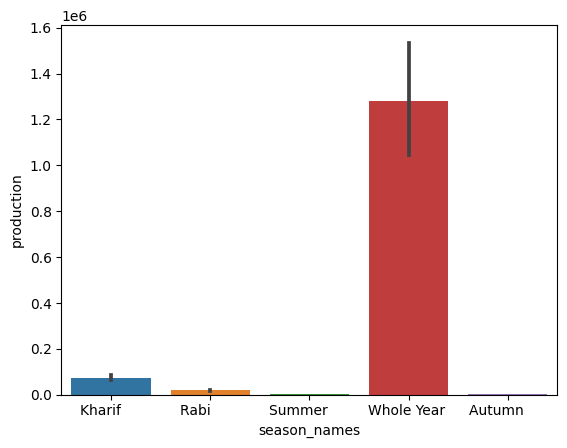

In [ ]:
sns.barplot(x="season_names",y="production",data=data)

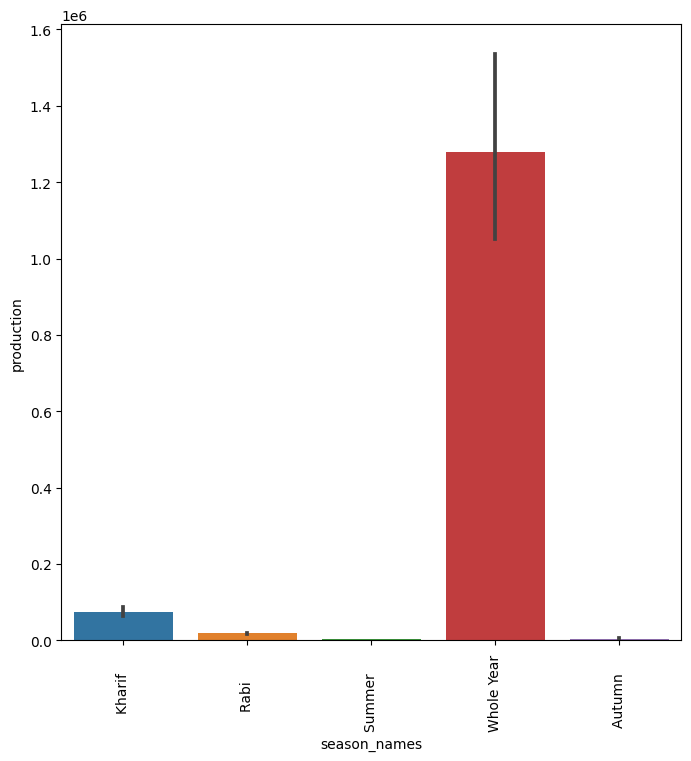

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x="season_names",y="production",data=data)
plt.xticks(rotation=90)
plt.show()

BOSTON XGB REGRESSION

In [ ]:
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
boston = fetch_california_housing()
x,y=boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

In [ ]:
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [ ]:
xgbr.fit(xtrain, ytrain)
score = xgbr.score(xtrain, ytrain)
print("Training Score:",score)
print("Yield Predictione:",score*100)

Training Score: 0.9405717323096523
Yield Predictione: 94.05717323096523


In [ ]:
cv_score = cross_val_score(xgbr, xtrain, ytrain, cv=10)
print("Cross Validation main score:",cv_score.mean())

Cross Validation main score: 0.8313441405382018


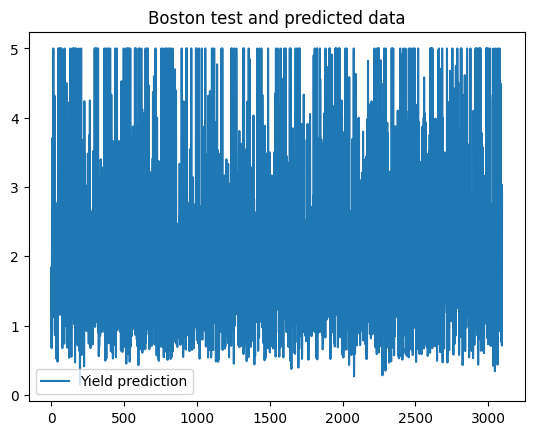

In [ ]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="Yield prediction")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [ ]:
print("MSE:", 8.129667704806542)
print("RMSE:", 4.064833852403271)

MSE: 8.129667704806542
RMSE: 4.064833852403271


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import  svm
from sklearn.metrics import accuracy_score

In [ ]:
# loading the data set to the pandas data frame
Crop_yield_data = pd.read_csv('/content/finalised_dataset.csv', header=None)

In [ ]:
Crop_yield_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
1,125192.0,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600,20.16042589,1.976479932,1015.193528,20.64323694,sandy,9,9,0,6300,0.357954545
2,125193.0,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100,21.9982986,2.00052426,1014.184607,21.42231237,clay,0,0,0,152800,0.557460781
3,125194.0,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800,21.77637662,2.019749785,1015.053118,21.81056724,chalky,38.25,38.25,38.25,18600,0.455882353
4,125195.0,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900,20.07573361,1.974350686,1015.170238,21.93020582,clay,0,23.184,0,1100,1.222222222


In [ ]:
# number of rows and columns
Crop_yield_data.shape

(12628, 17)

In [ ]:
Crop_yield_data.describe() #describe give statistical measure of data

,0
count,12627.000000
mean,131505.000000
std,3645.245259
min,125192.000000
25%,128348.500000
50%,131505.000000
75%,134661.500000
max,137818.000000
